In [2]:
import torch 
import matplotlib.pyplot as plt

import pandas as pd


In [3]:
%load_ext autoreload
%autoreload 2
from svm import SVM

In [4]:
df = pd.read_csv('data/X_train.csv', header=None)

X = torch.tensor(df.values, dtype=torch.float32)

In [5]:
dfX_test = pd.read_csv('data/X_test.csv', header=None)
X_test = torch.tensor(dfX_test.values, dtype=torch.float32)


In [9]:
dfy_train = pd.read_csv('data/y_train.csv', header=None)
y = torch.tensor(dfy_train.values, dtype=torch.float32)
dfy_test = pd.read_csv('data/y_test.csv', header=None)
y_test = torch.tensor(dfy_test.values)


In [22]:
# best n_iters = 1000, lam = 0.0001, batch_size=32
# best n_iters = 8, lam = 0.001, batch_size=32, 83% on test set 91% on train set
model  = SVM(n_iters=8, lam= 0.001, batch_size=32)
model.fit(X, y)

In [12]:
from sklearn.metrics import confusion_matrix

In [23]:
y_train_pred = model.predict(X)
accuracy(confusion_matrix(y, y_train_pred))


0.9313650306748467

In [24]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm



array([[100, 134],
       [ 11, 379]], dtype=int64)

In [25]:
def accuracy(cm): 
    return (cm[0,0] + cm[1,1]) / cm.sum()
accuracy(cm)

0.7676282051282052

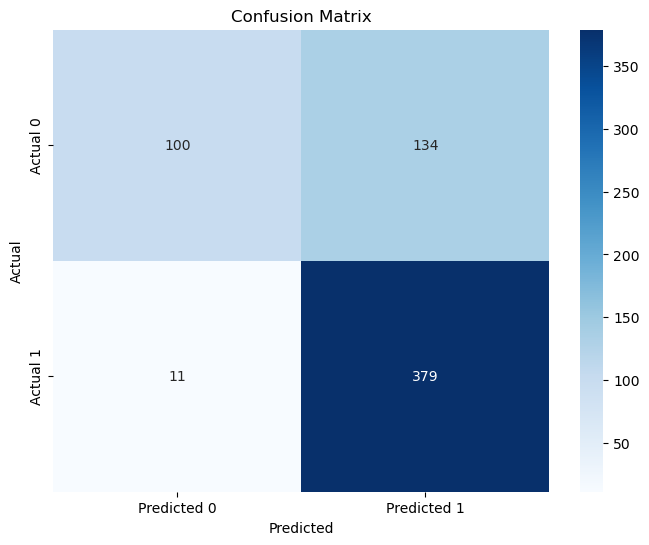

In [26]:
import seaborn as sns
# cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.7676282051282052

In [28]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.90      0.43      0.58       234
     Class 1       0.74      0.97      0.84       390

    accuracy                           0.77       624
   macro avg       0.82      0.70      0.71       624
weighted avg       0.80      0.77      0.74       624

